In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
palette = sns.color_palette('tab10')
sns.set_palette(palette)
sns.set(context='paper', style='white', font="cmr10", font_scale=1.2)
plt.rcParams['axes.formatter.use_mathtext'] = True

In [23]:
human = pd.read_pickle("data/jiang.pkl")
observations = human.query("sid==1 & trial==1")['color'].to_numpy()
times = np.arange(1, len(observations)+1)

In [3]:
observations

array([ 1, -1, -1,  1, -1,  1, -1, -1, -1, -1])

In [15]:
def mean_history(obs):
    output = []
    for o in range(len(obs)):
        output.append(np.mean(obs[:o+1]))
    return output

In [16]:
def cumulative_average(obs):
    output = []
    ca = 0
    for o in range(len(obs)):
        ca = (obs[o] + o*ca) / (o+1)
        output.append(ca)
    return output

In [17]:
def weighted_error(obs):
    output = []
    value = 0
    for o in range(len(obs)):
        weight = 1/(o+1)
        error = obs[o] - value
        value += weight * error
        output.append(value)
    return output

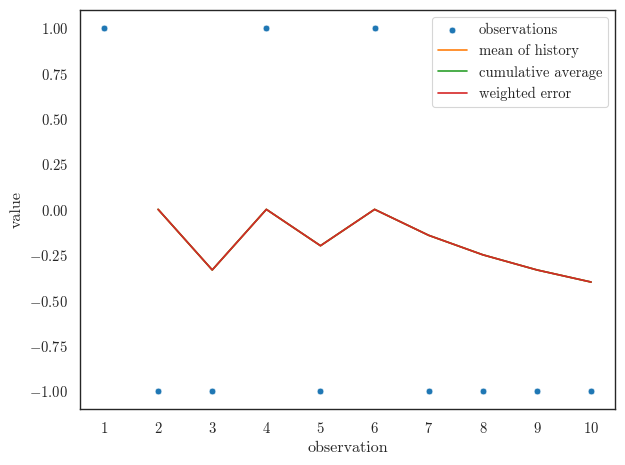

In [25]:
mh = mean_history(observations)
ca = cumulative_average(observations)
we = weighted_error(observations)
fig, ax = plt.subplots()
sns.scatterplot(x=times, y=observations, label='observations', color=palette[0])
sns.lineplot(x=times[1:], y=mh[1:], label='mean of history', color=palette[1])
sns.lineplot(x=times[1:], y=ca[1:], label='cumulative average', color=palette[2])
sns.lineplot(x=times[1:], y=we[1:], label='weighted error', color=palette[3])
ax.axvline(
ax.set(xlabel='observation', ylabel='value', xticks=times)
plt.tight_layout()

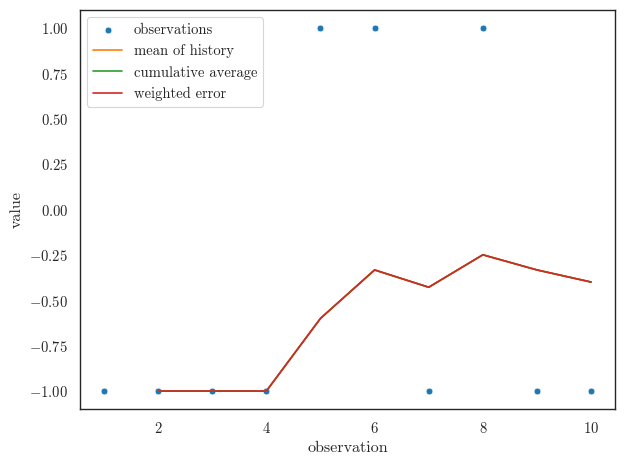

In [22]:
np.random.RandomState(seed=0).shuffle(observations)
mh = mean_history(observations)
ca = cumulative_average(observations)
we = weighted_error(observations)
fig, ax = plt.subplots()
sns.scatterplot(x=times, y=observations, label='observations', color=palette[0])
sns.lineplot(x=times[1:], y=mh[1:], label='mean of history', color=palette[1])
sns.lineplot(x=times[1:], y=ca[1:], label='cumulative average', color=palette[2])
sns.lineplot(x=times[1:], y=we[1:], label='weighted error', color=palette[3])
ax.set(xlabel='observation', ylabel='value')
plt.tight_layout()